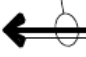

In [6]:
import cv2
from PIL import Image

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/11.png")

Image.fromarray(img)

0 6.0
1 994.0
2 172.5
3 9.5
4 3.0


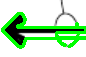

In [7]:
from ocr.line_detector import find_contours

contours = find_contours(img)
for i, cnt in enumerate(contours):
    print(i, cv2.contourArea(cnt))
    if cv2.contourArea(cnt) > 500:
        cv2.drawContours(img, [cnt], 0, (0, 255, 0), 2)

Image.fromarray(img)